In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('/content/taxi_tripdata.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83691 entries, 0 to 83690
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   VendorID               51173 non-null  float64
 1   lpep_pickup_datetime   83691 non-null  object 
 2   lpep_dropoff_datetime  83691 non-null  object 
 3   store_and_fwd_flag     51173 non-null  object 
 4   RatecodeID             51173 non-null  float64
 5   PULocationID           83691 non-null  int64  
 6   DOLocationID           83691 non-null  int64  
 7   passenger_count        51173 non-null  float64
 8   trip_distance          83691 non-null  float64
 9   fare_amount            83691 non-null  float64
 10  extra                  83691 non-null  float64
 11  mta_tax                83691 non-null  float64
 12  tip_amount             83691 non-null  float64
 13  tolls_amount           83691 non-null  float64
 14  ehail_fee              0 non-null      float64
 15  im

In [ ]:
df

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,1.0,2021-07-01 00:30:52,2021-07-01 00:35:36,N,1.0,74,168,1.0,1.20,6.00,0.50,0.5,0.00,0.00,NaN,0.3,7.30,2.0,1.0,0.0
1,2.0,2021-07-01 00:25:36,2021-07-01 01:01:31,N,1.0,116,265,2.0,13.69,42.00,0.50,0.5,0.00,0.00,NaN,0.3,43.30,2.0,1.0,0.0
2,2.0,2021-07-01 00:05:58,2021-07-01 00:12:00,N,1.0,97,33,1.0,0.95,6.50,0.50,0.5,2.34,0.00,NaN,0.3,10.14,1.0,1.0,0.0
3,2.0,2021-07-01 00:41:40,2021-07-01 00:47:23,N,1.0,74,42,1.0,1.24,6.50,0.50,0.5,0.00,0.00,NaN,0.3,7.80,2.0,1.0,0.0
4,2.0,2021-07-01 00:51:32,2021-07-01 00:58:46,N,1.0,42,244,1.0,1.10,7.00,0.50,0.5,0.00,0.00,NaN,0.3,8.30,2.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83686,NaN,2021-07-02 07:59:00,2021-07-02 08:33:00,NaN,NaN,218,169,NaN,18.04,50.24,2.75,0.0,0.00,6.55,NaN,0.3,59.84,NaN,NaN,NaN
83687,NaN,2021-07-02 07:02:00,2021-07-02 07:18:00,NaN,NaN,74,137,NaN,5.56,19.16,0.00,0.0,3.66,0.00,NaN,0.3,25.87,NaN,NaN,NaN
83688,NaN,2021-07-02 07:53:00,2021-07-02 08:15:00,NaN,NaN,69,75,NaN,5.13,22.45,0.00,0.0,0.00,0.00,NaN,0.3,22.75,NaN,NaN,NaN
83689,NaN,2021-07-02 07:58:00,2021-07-02 08:30:00,NaN,NaN,117,82,NaN,12.58,48.62,2.75,0.0,0.00,2.45,NaN,0.3,54.12,NaN,NaN,NaN


In [ ]:
df.isna().sum()

,0
VendorID,32518
lpep_pickup_datetime,0
lpep_dropoff_datetime,0
store_and_fwd_flag,32518
RatecodeID,32518
PULocationID,0
DOLocationID,0
passenger_count,32518
trip_distance,0
fare_amount,0


In [ ]:
df = df.drop(['ehail_fee'],axis=1)

In [ ]:
df['store_and_fwd_flag'].fillna('N',inplace=True)

In [ ]:
df['store_and_fwd_flag'].unique()

array(['N', 'Y'], dtype=object)

In [ ]:
categorical_cols = ['VendorID', 'RatecodeID', 'payment_type', 'trip_type', 'congestion_surcharge']

for col in categorical_cols:
    df.fillna(df[col].mode()[0] , inplace = True)

df['passenger_count'] = df['passenger_count'].fillna(df['passenger_count'].median())

df.isnull().sum()

,0
VendorID,0
lpep_pickup_datetime,0
lpep_dropoff_datetime,0
store_and_fwd_flag,0
RatecodeID,0
PULocationID,0
DOLocationID,0
passenger_count,0
trip_distance,0
fare_amount,0


In [ ]:
df['lpep_pickup_datetime'] = pd.to_datetime(df['lpep_pickup_datetime'])
df['lpep_dropoff_datetime'] = pd.to_datetime(df['lpep_dropoff_datetime'])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83691 entries, 0 to 83690
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   VendorID               83691 non-null  float64       
 1   lpep_pickup_datetime   83691 non-null  datetime64[ns]
 2   lpep_dropoff_datetime  83691 non-null  datetime64[ns]
 3   store_and_fwd_flag     83691 non-null  object        
 4   RatecodeID             83691 non-null  float64       
 5   PULocationID           83691 non-null  int64         
 6   DOLocationID           83691 non-null  int64         
 7   passenger_count        83691 non-null  float64       
 8   trip_distance          83691 non-null  float64       
 9   fare_amount            83691 non-null  float64       
 10  extra                  83691 non-null  float64       
 11  mta_tax                83691 non-null  float64       
 12  tip_amount             83691 non-null  float64       
 13  t

In [ ]:
payment_type_mapping = {
    1: 'Credit card',
    2: 'Cash',
    3: 'No charge',
    4: 'Dispute',
    5: 'Unknown',
    6: 'Voided trip'
}

df['payment_type'] = df['payment_type'].map(payment_type_mapping).astype('category')

print(df['payment_type'].head())
print(df['payment_type'].dtype)

0           Cash
1           Cash
2    Credit card
3           Cash
4           Cash
Name: payment_type, dtype: category
Categories (5, object): ['Cash', 'Credit card', 'Dispute', 'No charge', 'Unknown']
category


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83691 entries, 0 to 83690
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   VendorID               83691 non-null  float64       
 1   lpep_pickup_datetime   83691 non-null  datetime64[ns]
 2   lpep_dropoff_datetime  83691 non-null  datetime64[ns]
 3   store_and_fwd_flag     83691 non-null  object        
 4   RatecodeID             83691 non-null  float64       
 5   PULocationID           83691 non-null  int64         
 6   DOLocationID           83691 non-null  int64         
 7   passenger_count        83691 non-null  float64       
 8   trip_distance          83691 non-null  float64       
 9   fare_amount            83691 non-null  float64       
 10  extra                  83691 non-null  float64       
 11  mta_tax                83691 non-null  float64       
 12  tip_amount             83691 non-null  float64       
 13  t

In [ ]:
print('before removing duplicated' , df.duplicated().sum())
df.drop_duplicates(inplace=True)
print('after removing duplicated' , df.duplicated().sum())

before removing duplicated 0
after removing duplicated 0


In [ ]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
VendorID,83691.0,1.908963,1.0,2.0,2.0,2.0,2.0,0.287664
lpep_pickup_datetime,83691,2021-07-16 10:39:52.058405376,2008-12-31 23:12:53,2021-07-08 19:50:55,2021-07-16 11:58:17,2021-07-24 12:48:20,2021-08-01 00:06:03,NaN
lpep_dropoff_datetime,83691,2021-07-16 11:04:18.356370176,2008-12-31 23:27:09,2021-07-08 20:25:41.500000,2021-07-16 12:26:04,2021-07-24 13:13:41.500000,2021-08-01 19:55:44,NaN
RatecodeID,83691.0,1.485918,1.0,1.0,1.0,2.0,5.0,0.73044
PULocationID,83691.0,108.362572,3.0,56.0,75.0,166.0,265.0,70.37017
DOLocationID,83691.0,133.270005,1.0,69.0,132.0,205.0,265.0,77.216791
passenger_count,83691.0,1.576788,0.0,1.0,1.0,2.0,32.0,0.84041
trip_distance,83691.0,194.354699,0.0,1.35,2.76,6.2,260517.93,4405.549221
fare_amount,83691.0,20.388305,-150.0,9.0,16.0,26.83,480.0,15.583552
extra,83691.0,1.156707,-4.5,0.0,0.5,2.75,8.25,1.367897


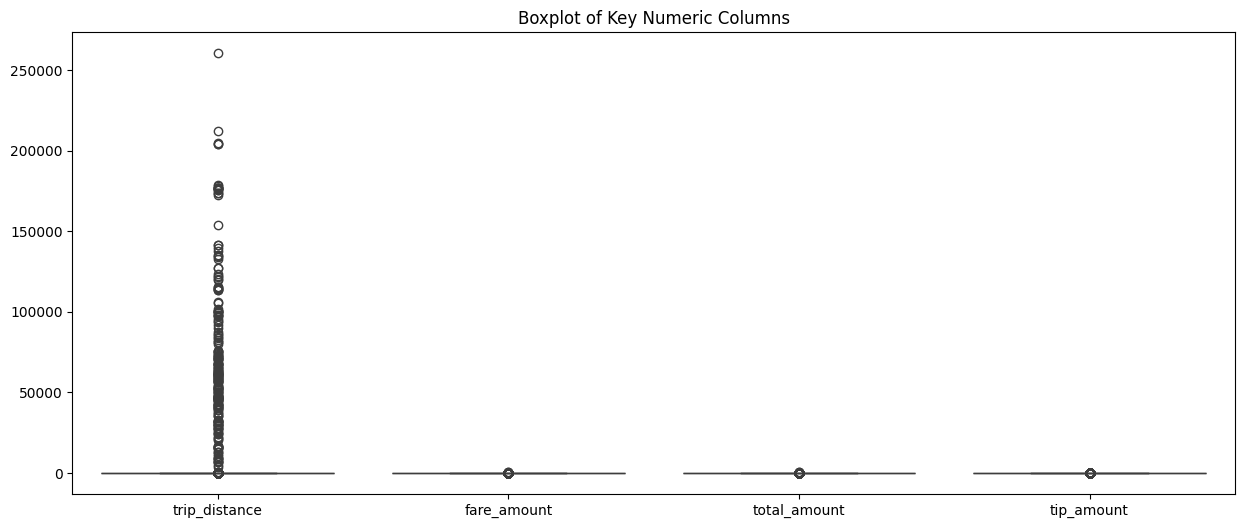

In [ ]:
plt.figure(figsize=(15, 6))
sns.boxplot(data=df[['trip_distance', 'fare_amount', 'total_amount', 'tip_amount']])
plt.title("Boxplot of Key Numeric Columns")
plt.show()

In [ ]:
fee_columns = ['mta_tax', 'improvement_surcharge', 'congestion_surcharge']
df[fee_columns] = df[fee_columns].abs()

df = df[df['fare_amount'] >= 0]
df = df[df['total_amount'] >= 0]
df = df[df['tip_amount'] >= 0]

df = df[df['passenger_count'] <= 5]

df = df[df['trip_distance'] <= 100]

df = df[df['fare_amount'] <= df['fare_amount'].quantile(0.99)]
df = df[df['total_amount'] <= df['total_amount'].quantile(0.99)]
df = df[df['lpep_dropoff_datetime'] > df['lpep_pickup_datetime']]


In [ ]:
df['trip_duration'] = (df['lpep_dropoff_datetime'] - df['lpep_pickup_datetime']).dt.total_seconds() / 60

In [ ]:
df = df[~((df['trip_duration'] < 1) & (df['total_amount'] > 7) & (df['trip_distance'] == 0))]

In [ ]:
df['pickup_hour'] = df['lpep_pickup_datetime'].dt.hour
df['pickup_day'] = df['lpep_pickup_datetime'].dt.day
df['pickup_weekday'] = df['lpep_pickup_datetime'].dt.weekday
df['pickup_month'] = df['lpep_pickup_datetime'].dt.month

df.head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,trip_duration,pickup_hour,pickup_day,pickup_weekday,pickup_month
0,1.0,2021-07-01 00:30:52,2021-07-01 00:35:36,N,1.0,74,168,1.0,1.20,6.0,...,0.3,7.30,Cash,1.0,0.0,4.733333,0,1,3,7
1,2.0,2021-07-01 00:25:36,2021-07-01 01:01:31,N,1.0,116,265,2.0,13.69,42.0,...,0.3,43.30,Cash,1.0,0.0,35.916667,0,1,3,7
2,2.0,2021-07-01 00:05:58,2021-07-01 00:12:00,N,1.0,97,33,1.0,0.95,6.5,...,0.3,10.14,Credit card,1.0,0.0,6.033333,0,1,3,7
3,2.0,2021-07-01 00:41:40,2021-07-01 00:47:23,N,1.0,74,42,1.0,1.24,6.5,...,0.3,7.80,Cash,1.0,0.0,5.716667,0,1,3,7
4,2.0,2021-07-01 00:51:32,2021-07-01 00:58:46,N,1.0,42,244,1.0,1.10,7.0,...,0.3,8.30,Cash,1.0,0.0,7.233333,0,1,3,7


In [ ]:
df = df[df['trip_duration'] >= 1]

df = df[df['trip_duration'] <= 720]


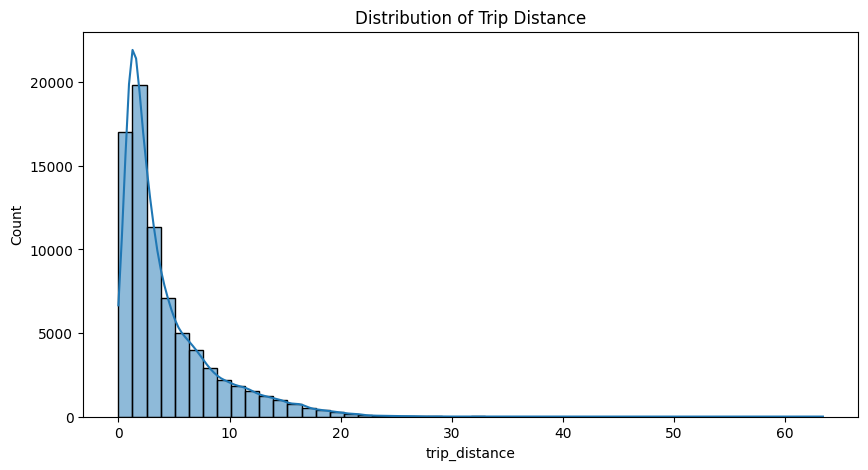

In [ ]:
plt.figure(figsize=(10, 5))
sns.histplot(df['trip_distance'], bins=50, kde=True)
plt.title("Distribution of Trip Distance")
plt.show()

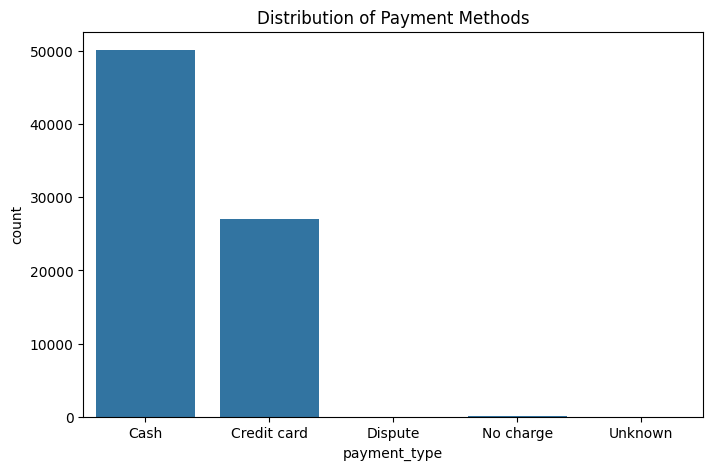

In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(x=df['payment_type'])
plt.title("Distribution of Payment Methods")
plt.show()

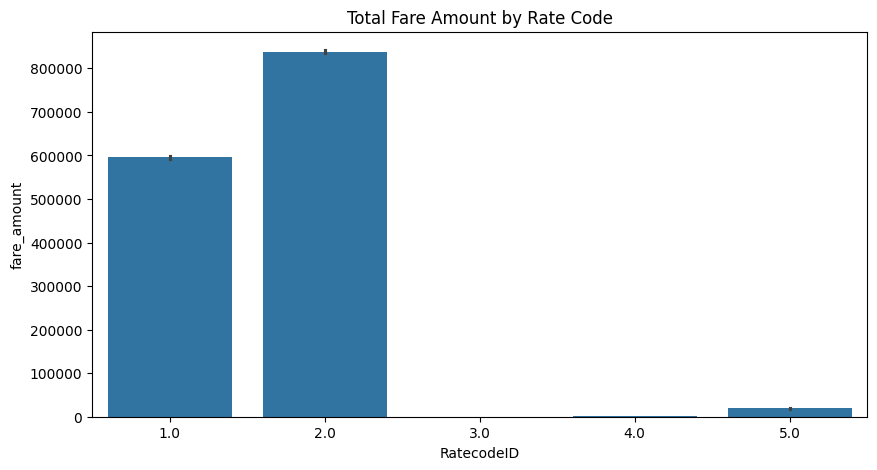

In [ ]:
plt.figure(figsize=(10, 5))
sns.barplot(x=df['RatecodeID'], y=df['fare_amount'], estimator=sum)
plt.title("Total Fare Amount by Rate Code")
plt.show()


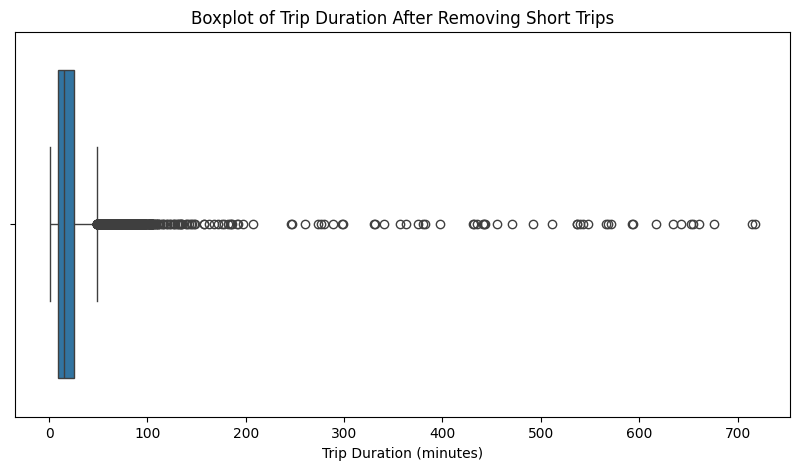

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['trip_duration'])
plt.title("Boxplot of Trip Duration After Removing Short Trips")
plt.xlabel("Trip Duration (minutes)")
plt.show()


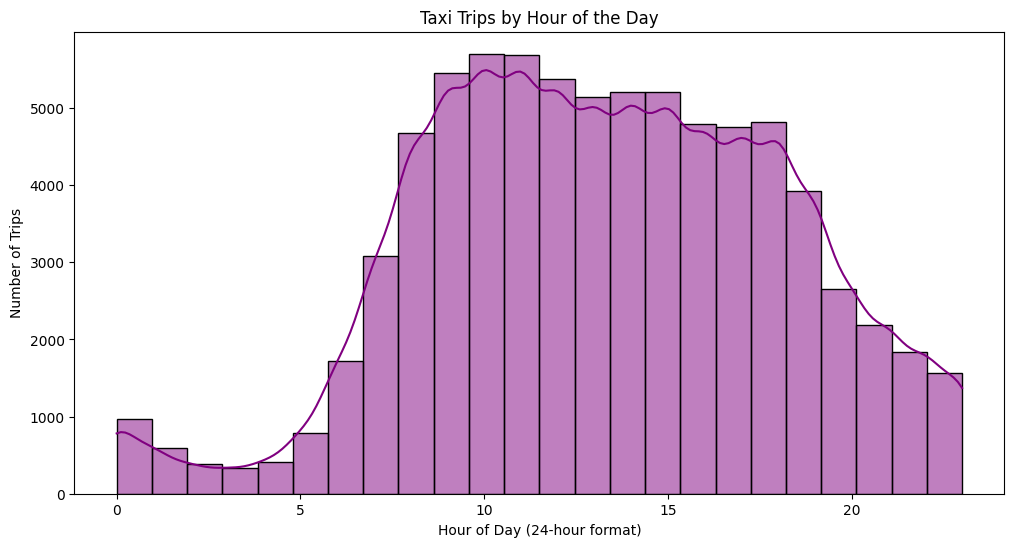

In [ ]:
plt.figure(figsize=(12, 6))
sns.histplot(df['pickup_hour'], bins=24, kde=True, color="purple")
plt.title("Taxi Trips by Hour of the Day")
plt.xlabel("Hour of Day (24-hour format)")
plt.ylabel("Number of Trips")
plt.show()

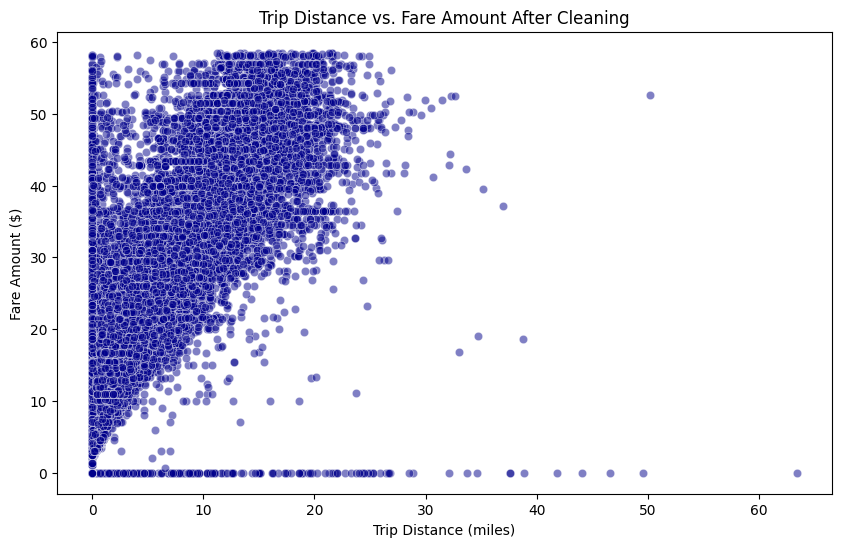

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['trip_distance'], y=df['fare_amount'], alpha=0.5, color="darkblue")
plt.xlabel("Trip Distance (miles)")
plt.ylabel("Fare Amount ($)")
plt.title("Trip Distance vs. Fare Amount After Cleaning")
plt.show()


In [ ]:
from scipy.stats import zscore

# Compute Z-scores for trip distance and fare amount
df['trip_distance_z'] = zscore(df['trip_distance'])
df['fare_amount_z'] = zscore(df['fare_amount'])

# Define threshold (usually |z| > 3 means an outlier)
threshold = 3

# Remove rows where either trip_distance or fare_amount is an extreme outlier
df = df[(df['trip_distance_z'].abs() < threshold) & (df['fare_amount_z'].abs() < threshold)]

# Drop the temp Z-score columns
df = df.drop(columns=['trip_distance_z', 'fare_amount_z'])

# Verify new distribution
df[['trip_distance', 'fare_amount']].describe()


,trip_distance,fare_amount
count,75584.000000,75584.000000
mean,3.924807,18.198273
std,3.594140,11.388156
min,0.000000,0.000000
25%,1.360000,9.000000
50%,2.630000,15.450000
75%,5.412500,24.540000
max,16.860000,55.160000


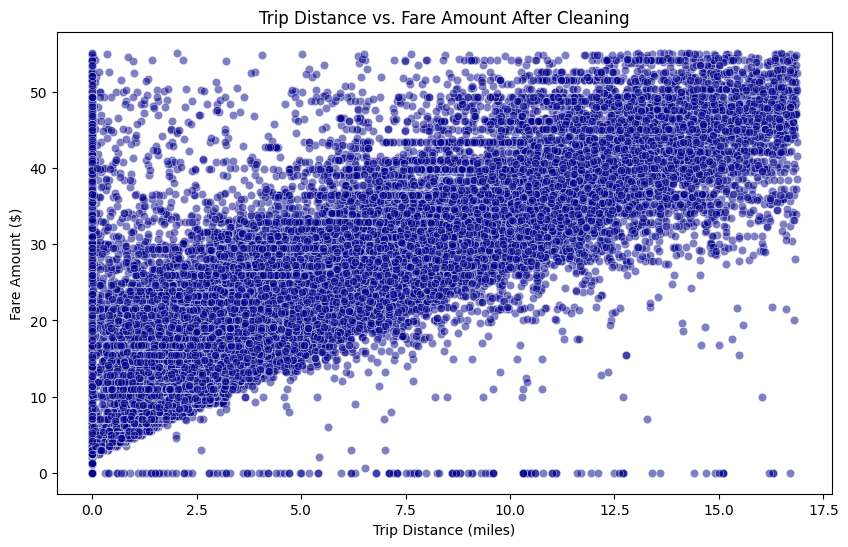

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['trip_distance'], y=df['fare_amount'], alpha=0.5, color="darkblue")
plt.xlabel("Trip Distance (miles)")
plt.ylabel("Fare Amount ($)")
plt.title("Trip Distance vs. Fare Amount After Cleaning")
plt.show()


In [ ]:
df.to_csv("/content/taxi_tripdata_cleaned.csv", index=False)